In [81]:
import numpy as np

# Input: sequence of images: b/w
def create_input(l=32,b=48,t=48):
    # creates input of shape (t,l,b)
    input = np.zeros((t,l,b),dtype=np.bool)
    for i in range(t):
        input[i,:,(i*l)//t]=True
    return input

def delay(x,tau,dt):
    #print(np.shape(x))
    a,t_max = np.shape(x)
    output = np.zeros((a,t_max))
    for i in range(t_max-1):
        output[:,i+1] = x[:,i]+output[:,i]-output[:,i]/tau*dt
    return output

def medulla(input,tau,dt):
    # input from pair of ommatidia to HR detector pair. Shape: (2,t)
    _,t=np.shape(input)
    output = np.zeros((4,t))

    output[0,:] = np.sum(delay(input[0:-1,:],tau['1'],dt)*delay(input[1:,:],tau['b'],dt),0)
    output[1,:] = np.sum(delay(input[0:-1,:],tau['b'],dt)*delay(input[1:,:],tau['1'],dt),0)
    output[2,:] = np.sum(delay(input[0:-1,:],tau['2'],dt)*delay(input[1:,:],tau['b'],dt),0)
    output[3,:] = np.sum(delay(input[0:-1,:],tau['b'],dt)*delay(input[1:,:],tau['2'],dt),0)
    #prog_tau
    #reg_tau
    #tau_s = 
    return output

def lobulla(input):
    # input shape: (l*b//2,4,t)
    sum_out = np.sum(input, axis=0)
    return np.concatenate(([sum_out[0]-sum_out[1]],[sum_out[2]-sum_out[3]]),axis=0)   # shape: (2,t)

#def AVDU # TODO Vibhu :)

(10, 100)


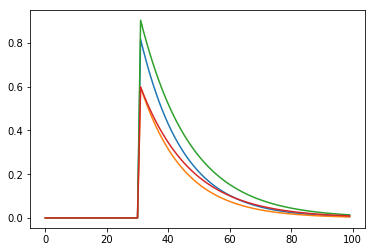

In [82]:
x=np.zeros((10,100))
x[1,20]=1
x[2,30]=1
print(np.shape(x))
tau={'1':5,'2':10,'b':2}
tau['1']=5
tau['2']=10
tau['b']=2
a=medulla(x,tau,0.1)
import matplotlib.pyplot as plt
#plt.plot(delay(x,10,0.1)[1,:])
plt.plot(np.transpose(a))

In [44]:
np.shape(lobulla(np.zeros((3,4,5))))

(2, 5)